In [109]:
import numpy as np

In [110]:
import pandas as pd

In [111]:
np.random.seed(42)

In [112]:
apartments = [f"Apt_{i}" for i in range(1,21)]

In [113]:
dates = pd.date_range(start="2025-07-01",periods=30,freq='D')

In [114]:
data={
    "Date":np.tile(dates,len(apartments)),
    "Apartment":np.repeat(apartments, len(dates)),
    "Electricity_usage":np.random.normal(loc=20,scale=5,size=len(dates)* len(apartments))
}

In [115]:
df=pd.DataFrame(data)

In [116]:
df

,Date,Apartment,Electricity_usage
0,2025-07-01,Apt_1,22.483571
1,2025-07-02,Apt_1,19.308678
2,2025-07-03,Apt_1,23.238443
3,2025-07-04,Apt_1,27.615149
4,2025-07-05,Apt_1,18.829233
...,...,...,...
595,2025-07-26,Apt_20,17.449918
596,2025-07-27,Apt_20,18.650625
597,2025-07-28,Apt_20,15.106181
598,2025-07-29,Apt_20,17.778534


In [117]:
df["Electricity_usage"]=df["Electricity_usage"].round(2)

In [118]:
df

,Date,Apartment,Electricity_usage
0,2025-07-01,Apt_1,22.48
1,2025-07-02,Apt_1,19.31
2,2025-07-03,Apt_1,23.24
3,2025-07-04,Apt_1,27.62
4,2025-07-05,Apt_1,18.83
...,...,...,...
595,2025-07-26,Apt_20,17.45
596,2025-07-27,Apt_20,18.65
597,2025-07-28,Apt_20,15.11
598,2025-07-29,Apt_20,17.78


In [119]:
print(df.isnull().sum())

Date                 0
Apartment            0
Electricity_usage    0
dtype: int64


In [120]:
print(df.describe())

                      Date  Electricity_usage
count                  600         600.000000
mean   2025-07-15 12:00:00          19.932500
min    2025-07-01 00:00:00           3.790000
25%    2025-07-08 00:00:00          16.530000
50%    2025-07-15 12:00:00          20.040000
75%    2025-07-23 00:00:00          23.112500
max    2025-07-30 00:00:00          39.260000
std                    NaN           4.861071


In [121]:
print(df.dtypes)

Date                 datetime64[ns]
Apartment                    object
Electricity_usage           float64
dtype: object


In [122]:
usage_per_apartment = df.groupby("Apartment")["Electricity_usage"].sum().sort_values(ascending=False)
print(usage_per_apartment)

Apartment
Apt_11    642.31
Apt_6     641.82
Apt_13    634.22
Apt_10    616.09
Apt_20    613.14
Apt_7     609.87
Apt_8     607.18
Apt_16    606.97
Apt_14    604.33
Apt_3     601.93
Apt_4     596.99
Apt_15    591.38
Apt_19    586.61
Apt_5     585.76
Apt_2     581.81
Apt_9     578.48
Apt_1     571.80
Apt_17    570.33
Apt_12    568.99
Apt_18    549.49
Name: Electricity_usage, dtype: float64


In [123]:
daily_avg = df.groupby("Date")["Electricity_usage"].mean()
print(daily_avg.head())

Date
2025-07-01    21.0440
2025-07-02    20.8695
2025-07-03    19.5685
2025-07-04    20.9855
2025-07-05    19.7835
Name: Electricity_usage, dtype: float64


In [124]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [125]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

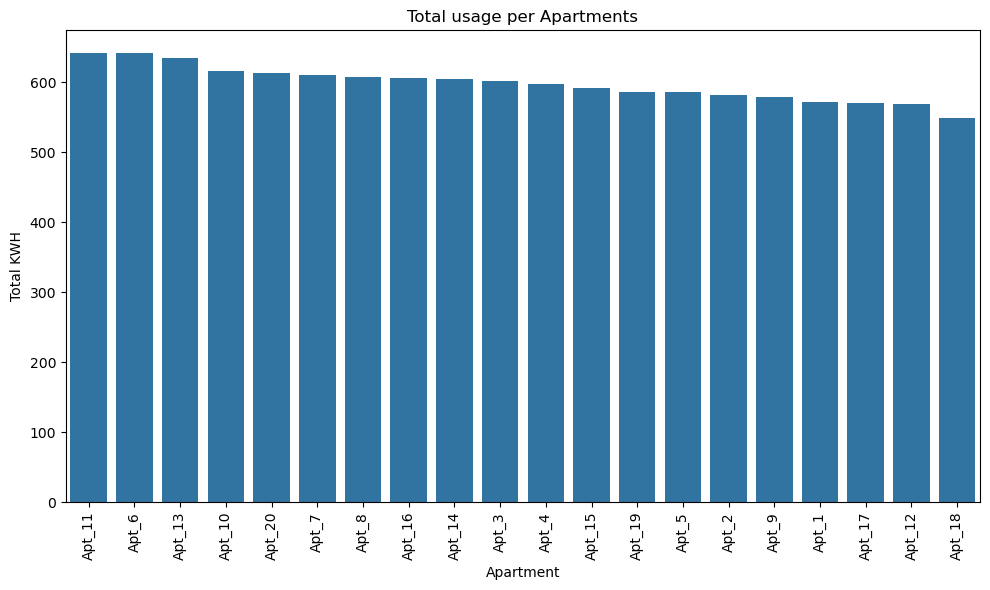

In [128]:
plt.figure(figsize=(10,6))
sns.barplot(x = usage_per_apartment.index, y = usage_per_apartment.values)
plt.xticks(rotation = 90)
plt.title("Total usage per Apartments")
plt.xlabel("Apartment")
plt.ylabel("Total KWH")
plt.tight_layout()
plt.show()

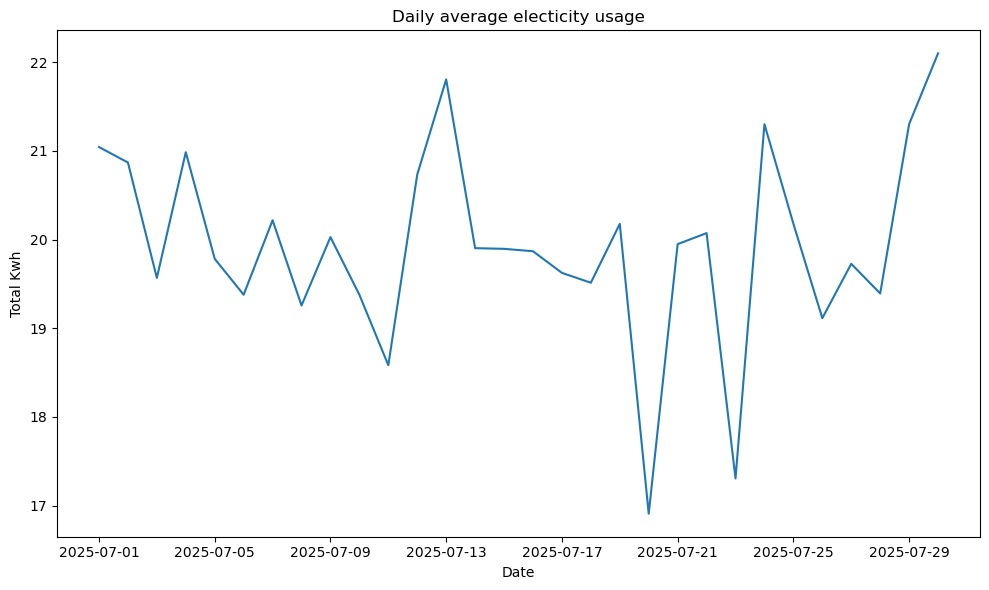

In [142]:
plt.figure(figsize=(10,6))
sns.lineplot(x=daily_avg.index,y=daily_avg.values)
plt.title("Daily average electicity usage")
plt.xlabel("Date")
plt.ylabel("Total Kwh")
plt.tight_layout()
plt.show ()

In [144]:
threshold = df["Electricity_usage"].mean()+2 *df["Electricity_usage"].std()
df["High_Usage_flag"] = df["Electricity_usage"] > threshold
print(df[df["High_Usage_flag"] == True].head())

          Date Apartment  Electricity_usage  High_Usage_flag
113 2025-07-24     Apt_4              32.32             True
125 2025-07-06     Apt_5              30.95             True
179 2025-07-30     Apt_6              33.60             True
209 2025-07-30     Apt_7              39.26             True
220 2025-07-11     Apt_8              31.57             True
